Abstract:

Este proyecto se centra en el análisis del dataset dado por la Dirección Nacional de los Registros Nacionales de la Propiedad del Automotor (DNRPA), que detalla embargos y levantamientos de embargos sobre automotores en Argentina. El dataset incluye 4,600 registros y 25 variables que describen el trámite, el vehículo y el titular.

✅ 1: ¿Cuál es la relación entre el tipo de trámite y la provincia de registro?


 Hipótesis: Hay provincias donde los levantamientos de embargos son más frecuentes que las anotaciones de embargos.

✅ Pregunta 2: ¿Existe una relación entre el año del modelo del automotor y la probabilidad de que el vehículo sea embargado o liberado de un embargo?

Hipótesis:
Los automotores más nuevos presentan una menor proporción de embargos judiciales y una mayor proporción de levantamientos de embargos, posiblemente debido a su mayor valor de mercado y a que suelen estar más al día con la documentación y obligaciones legales.

✅ Pregunta 3: ¿Existe una relación entre el año del modelo del automotor y el año en que fue inscripto inicialmente en el registro?

Hipótesis:
La mayoría de los vehículos se inscriben poco después de su fabricación, aunque pueden existir algunas variaciones por falta de papeles.

✅ Pregunta 4:¿Existe una diferencia significativa en la distribución de embargos judiciales sobre automotores según el género del titular?

Los embargos judiciales sobre automotores afectan principalmente a titulares masculinos, reflejando tanto la mayor titularidad de vehículos por parte de hombres como posibles diferencias en el acceso y uso del crédito o la exposición a conflictos judiciales según el género.

In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [372]:
df = pd.read_csv("C:\\Users\\andre\\OneDrive\\Escritorio\\Data Science- CoderHouse\\Entrega\\dnrpa-embargos-levantamiento-embargos-autos-202504.csv")
print("Consta de", df.shape)

df.head(1)

Consta de (4600, 25)


,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,...,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id
0,MEDIDAS JUDICIALES - LEVANTAMIENTO,2025-04-01,2013-01-08,1150,AVELLANEDA Nº 3,Buenos Aires,Protocolo 21,2013.0,92,TRACTOR C/CABINA DORMITORIO,...,Privado,Jurídica,AVELLANEDA,BUENOS AIRES,No aplica,2004,No aplica,100.0,6,NaN


In [373]:
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

 1. tramite_tipo
 2. tramite_fecha
 3. fecha_inscripcion_inicial
 4. registro_seccional_codigo
 5. registro_seccional_descripcion
 6. registro_seccional_provincia
 7. automotor_origen
 8. automotor_anio_modelo
 9. automotor_tipo_codigo
10. automotor_tipo_descripcion
11. automotor_marca_codigo
12. automotor_marca_descripcion
13. automotor_modelo_codigo
14. automotor_modelo_descripcion
15. automotor_uso_codigo
16. automotor_uso_descripcion
17. titular_tipo_persona
18. titular_domicilio_localidad
19. titular_domicilio_provincia
20. titular_genero
21. titular_anio_nacimiento
22. titular_pais_nacimiento
23. titular_porcentaje_titularidad
24. titular_domicilio_provincia_id
25. titular_pais_nacimiento_id


Veo si existen valores nulos en el dataset, y si afecta de alguna manera a las hipotesis/preguntas generadas

In [374]:
df.isnull().sum()

tramite_tipo                        0
tramite_fecha                       0
fecha_inscripcion_inicial           0
registro_seccional_codigo           0
registro_seccional_descripcion      0
registro_seccional_provincia        0
automotor_origen                    0
automotor_anio_modelo              35
automotor_tipo_codigo             126
automotor_tipo_descripcion          0
automotor_marca_codigo             62
automotor_marca_descripcion         0
automotor_modelo_codigo            93
automotor_modelo_descripcion        0
automotor_uso_codigo                0
automotor_uso_descripcion           0
titular_tipo_persona                0
titular_domicilio_localidad         2
titular_domicilio_provincia         0
titular_genero                      0
titular_anio_nacimiento             0
titular_pais_nacimiento             0
titular_porcentaje_titularidad      0
titular_domicilio_provincia_id      0
titular_pais_nacimiento_id        849
dtype: int64

1-Relación entre el tipo de trámite y la provincia de registro

In [375]:
px.bar(
    df.groupby(['registro_seccional_provincia', 'tramite_tipo']).size().reset_index(name='cantidad'),
    x="registro_seccional_provincia",
    y="cantidad",
    color="tramite_tipo",
    title="Cantidad de trámites por provincia y tipo de trámite",
    labels={"registro_seccional_provincia": "Provincia", "cantidad": "Totalidad de Trámites", "tramite_tipo": "Tramite Tipo"}
)

MEDIDAS JUDICIALES - ANOTACION ----> Vehículo Embargado

MEDIDAS JUDICIALES - LEVANTAMIENTO ---->Vehículo Liberado

En el grafico de distribución de trámites por provincia y tipo de trámite, se puede ver que las provincias de Buenos Aires y Córdoba existen una mayor cantidad de registros, tanto en embargos como en levantamientos de embargos. Esto podría deberse a la mayor cantidad de vehículos registrados en estas provincias o a una mayor actividad económica y judicial que impacta en la generación de embargos, y/o su levantamiento.

2- La ocurrencia de embargos o levantamientos, contra año del modelo del automotor

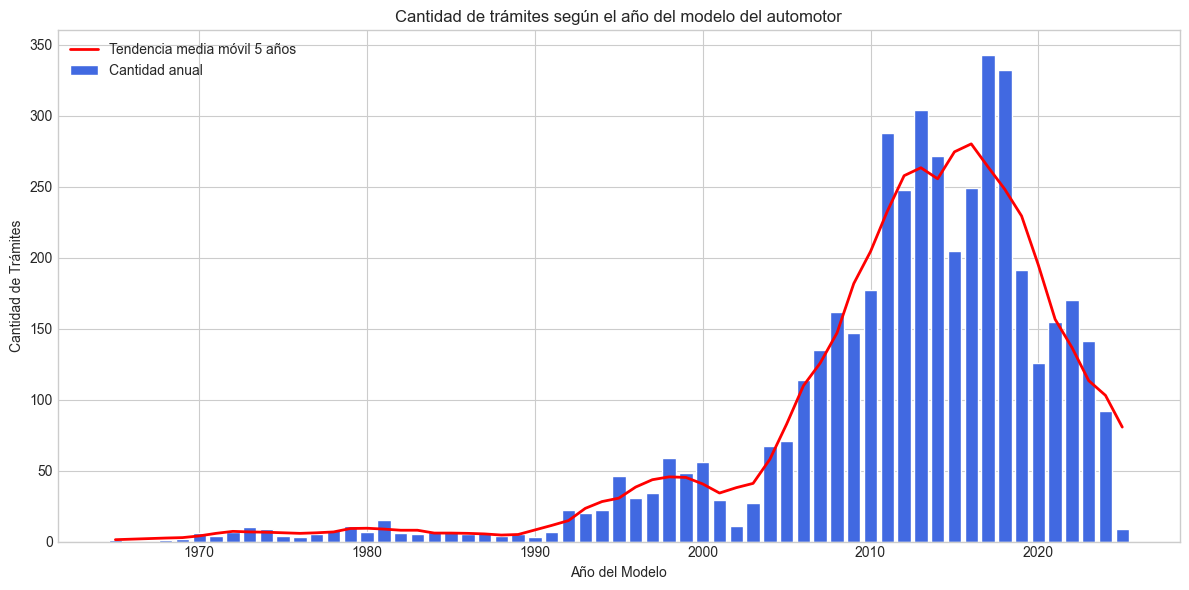

In [376]:
# Filtre autos con año de modelo válido y desde 1965
df_validos = df[df['automotor_anio_modelo'].notnull() & (df['automotor_anio_modelo'] >= 1965)]
# Rangos para el grafico
min_anio = int(df_validos['automotor_anio_modelo'].min())
max_anio = int(df_validos['automotor_anio_modelo'].max())

cantidad_modelo = (df_validos.groupby('automotor_anio_modelo').size().reset_index(name='cantidad'))
# Media móvil de 5 años para la tendencia
cantidad_modelo['media_movil'] = cantidad_modelo['cantidad'].rolling(window=5, center=True, min_periods=1).mean()

plt.figure(figsize=(12, 6))
plt.bar(
    cantidad_modelo['automotor_anio_modelo'], 
    cantidad_modelo['cantidad'], 
    color='royalblue', label='Cantidad anual'
    )
plt.plot(
    cantidad_modelo['automotor_anio_modelo'],
    cantidad_modelo['media_movil'], 
    color='red', linewidth=2, 
    label='Tendencia media móvil 5 años'
    )

plt.xlabel("Año del Modelo")
plt.ylabel("Cantidad de Trámites")
plt.title("Cantidad de trámites según el año del modelo del automotor")
plt.legend()
plt.tight_layout()
plt.show()

Se registra un mayor volumen de trámites (embargos y levantamientos) en vehículos más nuevos, especialmente entre los modelos 2010 y 2020, lo que sugiere una mayor exposición de estos autos a medidas judiciales. Esto podría deberse a que, al tener un mayor valor económico, son utilizados con mayor frecuencia como garantía en conflictos financieros o judiciales. Y tambien mayor cantidad de modelos de esos años disponibles

3-Relación entre año del modelo del automotor y año de inscripción inicial

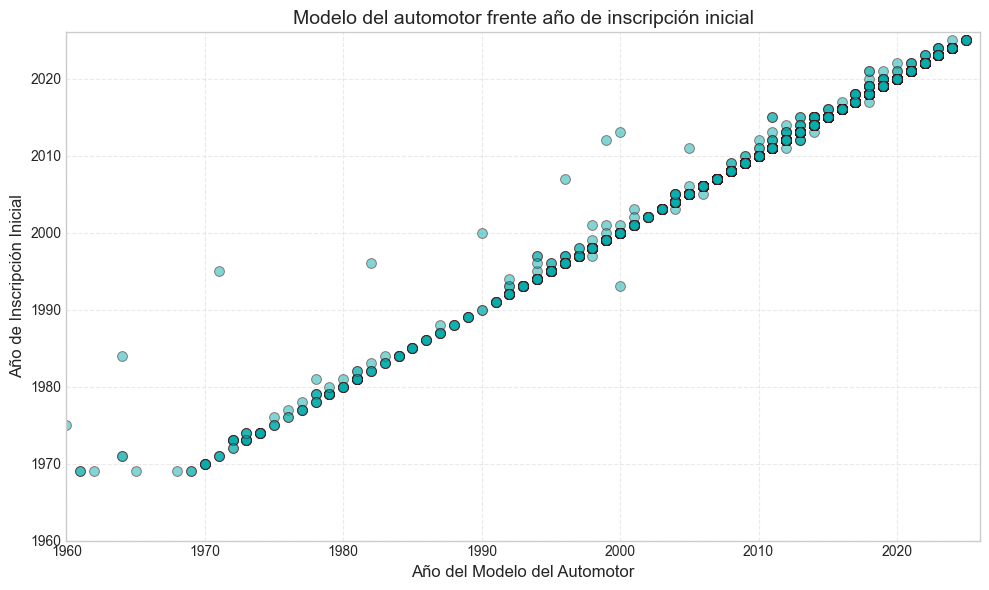

In [377]:
# Convierte la columna de inscripción inicial a formato fecha y extraemos el año
df['fecha_inscripcion_inicial'] = pd.to_datetime(df['fecha_inscripcion_inicial'], errors='coerce')
df['anio_inscripcion_inicial'] = df['fecha_inscripcion_inicial'].dt.year

# Filtra los datos: solo autos con año de modelo y año de inscripción válidos, y modelos desde 1960
df_plot = df.dropna(subset=['automotor_anio_modelo', 'anio_inscripcion_inicial'])
df_plot = df_plot[df_plot['automotor_anio_modelo'] >= 1960]


plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))


sns.scatterplot(
    data=df_plot,
    x='automotor_anio_modelo',
    y='anio_inscripcion_inicial',
    color="#04ADAD",        
    alpha=0.5,
    s=50,
    edgecolor="#4A0505",     
    linewidth=0.7
)

plt.xlabel("Año del Modelo del Automotor", fontsize=12)
plt.ylabel("Año de Inscripción Inicial", fontsize=12)
plt.title("Modelo del automotor frente año de inscripción inicial", fontsize=14)

# Límites de los ejes para mejor visualización
plt.xlim(1960, df_plot['automotor_anio_modelo'].max()+1)
plt.ylim(1960, df_plot['anio_inscripcion_inicial'].max()+1)

plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Este gráfico de dispersión muestra una fuerte relación entre el año del modelo del automotor y el año de inscripción inicial: la mayoría de los vehículos son inscriptos al poco tiempo de su fabricación. Sin embargo, también se observan inscripciones de modelos antiguos en años recientes, lo que puede indicar transferencias, regularizaciones o inscripciones tardías. Este comportamiento es relevante para entender cómo los embargos judiciales pueden afectar tanto a vehículos nuevos como a usados, y cómo la dinámica del mercado automotor influye en la exposición a medidas judiciales.

4-Distribución de género de los titulares de vehículos embargado

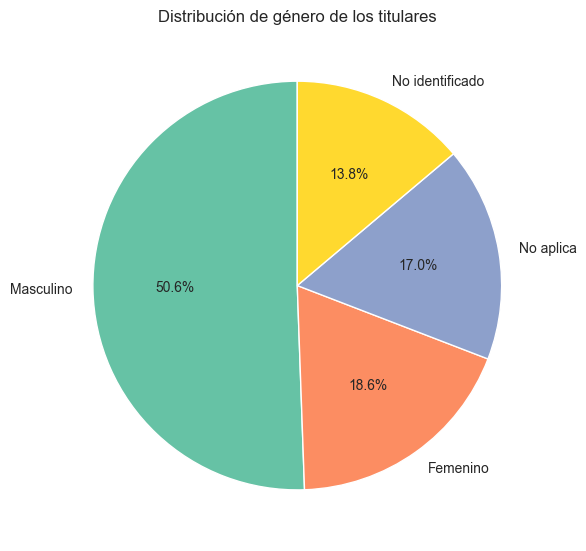

In [378]:
genero_counts = df['titular_genero'].value_counts(dropna=True)

# Paleta personalizada de colores pastel
colores = ['#66c2a5', '#fc8d62', '#8da0cb', '#ffd92f', '#e78ac3']

plt.figure(figsize=(6, 6))
plt.pie(
    genero_counts,
    labels=genero_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colores
)
plt.title("Distribución de género de los titulares")
plt.tight_layout()
plt.show()

El gráfico de torta muestra que la mayoría de los embargos judiciales sobre automotores recaen sobre titulares de género masculino, seguidos por el género femenino y, en menor medida, otros géneros. Esto refleja la mayor proporción de hombres como titulares de vehículos en Argentina, pero también puede indicar que los hombres están más expuestos a situaciones financieras o legales que derivan en embargos. Esta diferencia de género es relevante para comprender el perfil de quienes se ven afectados por medidas judiciales sobre automotores.